In [46]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import random
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import os,sys
opj = os.path.join
from tqdm import tqdm
import acd
from copy import deepcopy
sys.path.append('vae')
from model import init_specific_model
from losses import Loss, _get_log_pz_qz_prodzi_qzCx, _get_log_qz_qzi_perb
from dset import get_dataloaders
from training import Trainer
from utils import *
import pickle as pkl
import pandas as pd
from sim_gaussian_mixture import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
p.num_epochs = 100
p.seed = 13
p.hidden_dim = 30
p.eps = 0.01
p.beta = 0.0
p.mu = 0.005
p.lamb = 50
p.dirname = 'vary_beta0'

# seed
random.seed(p.seed)
np.random.seed(p.seed)
torch.manual_seed(p.seed)

# GET DATALOADERS
(train_loader, train_latents), (test_loader, test_latents) = define_dataloaders(p)

Text(tensor(-0.2233), tensor(-1.1456), 'x')

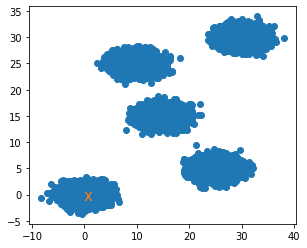

In [49]:
plot_2d_samples(train_latents)
z = train_latents[0:1,:]
plt.annotate("x", z[0], size=15, color='C1')

In [42]:
torch.stack(p.latent_vars[0])

TypeError: expected Tensor as element 0 in argument 0, but got int

In [ ]:
def log_density_gaussian(x, mu, logvar):
    """Calculates log density of a Gaussian.

    Parameters
    ----------
    x: torch.Tensor or np.ndarray or float
        Value at which to compute the density.

    mu: torch.Tensor or np.ndarray or float
        Mean.

    logvar: torch.Tensor or np.ndarray or float
        Log variance.
    """
    normalization = - 0.5 * (math.log(2 * math.pi) + logvar)
    inv_var = torch.exp(-logvar)
    log_density = normalization - 0.5 * ((x - mu)**2 * inv_var)
    return log_density